In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [10]:
#Import tables from Data and convert them to dataframes.
reveal_data =  pd.read_csv("Downloads/Reveal_EEO1_for_2016.csv")
tech_sector_data = pd.read_csv("Downloads/Tech_sector_diversity_demographics_2016.csv")
reveal_data_df = pd.DataFrame(reveal_data)
tech_sector_data_df = pd.DataFrame(tech_sector_data)

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/Reveal_EEO1_for_2016.csv'

In [11]:
# drop the unessecary columns

In [12]:
female_data = tech_sector_data_df[tech_sector_data_df["gender"]=="female"]
female_data_professionals = female_data[female_data["job_category"]=="Professionals"]

female_data = tech_sector_data_df[tech_sector_data_df["gender"]=="female"]
female_data_professionals = female_data[female_data["job_category"]=="Managers"]

female_data = tech_sector_data_df[tech_sector_data_df["gender"]=="female"]
female_data_professionals = female_data[female_data["job_category"]=="Executives"]


# #Convert count column's values to numerric.
female_data_professionals ["count"] = pd.to_numeric(female_data_professionals["count"])
female_data_professionals.dtypes

NameError: name 'tech_sector_data_df' is not defined

In [94]:
# Calculate the Number of Employment levels
position_demographics = reveal_data.loc[:, ["job_category"]]
position_demographics = position_demographics.drop_duplicates()
num_positions = position_demographics.count()[0]

# Display the total number of positions
pd.DataFrame({"Total Positions": [num_positions]})


,Total Positions
0,12


In [104]:
tech_sector_data_df = tech_sector_data_df.loc[reveal_data_df["count"] != "na",:]
tech_sector_data_df["count"]= pd.to_numeric(tech_sector_data_df["count"])
tech_sector_data_df

# Run basic calculations
employment_level_counts = tech_sector_data_df.groupby("job_category")["count"].sum().to_frame().reset_index()

tech_sector_data_df = tech_sector_data_df[tech_sector_data_df["job_category"].isin(["Professionals", "Managers","Executives"])]


In [128]:
employment_level_counts

,job_category,count
0,Executives,29759
1,Managers,290776
2,Professionals,1020840


In [140]:
# Run basic calculations
gender_data = tech_sector_data_df.groupby("job_category")["count"].sum().to_frame().reset_index()
gender_data = tech_sector_data_df.groupby("gender")["count"].sum().to_frame().reset_index()

tech_sector_data_df = tech_sector_data_df[tech_sector_data_df["job_category"].isin(["Professionals", "Managers","Executives"])]
tech_sector_data_df = tech_sector_data_df[tech_sector_data_df["gender"].isin(["Female", "Male","Both"])]


# Convert to DataFrame
#gender_data = pd.DataFrame({"Purchase Count": gender_counts, "Average Purchase Price": gender_average, "Total Purchase Value": gender_purchase_total, "Normalized Totals": normalized_total})

# Minor Data Wrangling
#gender_data["Average Purchase Price"] = gender_data["Average Purchase Price"].map("${:,.2f}".format)
#gender_data["Total Purchase Value"] = gender_data["Total Purchase Value"].map("${:,.2f}".format)
#gender_data ["Purchase Count"] = gender_data["Purchase Count"].map("{:,}".format)
#gender_data["Avg Total Purchase per Person"] = gender_data["Normalized Totals"].map("${:,.2f}".format)
#gender_data = gender_data.loc[:, ["Purchase Count", "Average Purchase Price", "Total Purchase Value", "Avg Total Purchase per Person"]]

# Display the Gender Table
gender_data



,gender,count
0,Both,461175
1,Female,242294
2,Male,637906


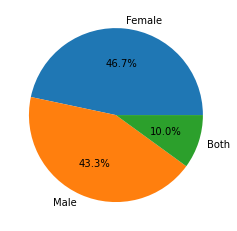

In [150]:
counts =tech_sector_data_df.gender.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')

plt.show()